In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import glob
from collections import Counter,defaultdict
import matplotlib.image as mpimg
from IPython.display import clear_output
import time
import warnings
warnings.filterwarnings('ignore')
from  sklearn.model_selection import train_test_split
import sys,os
from shutil import copyfile
import numpy as np
os.environ['CUDA_VISIBLE_DEVICES'] = ''



In [ ]:
attribute_img_path = '/media/mint/New Volume/3_semester_IIIT_D/CF/project/Category and Attribute/Anno/list_attr_img.txt'
attribute_cloth_path = '/media/mint/New Volume/3_semester_IIIT_D/CF/project/Category and Attribute/Anno/list_attr_cloth.txt'
img_path = '/media/mint/New Volume/3_semester_IIIT_D/CF/project/Category and Attribute/img/'

In [ ]:
# attribute_img = pd.read_csv(attribute_img_path,delim_whitespace=True)
attribute_cloth = pd.read_csv(attribute_cloth_path, sep="\s\s+") # columns = ['attribute_name', 'attribute_type'])

# reading attribute_img_path chunksize wise

In [ ]:
chunksize = 10 ** 4
attribute_type = 2

# print chunksize
# attribute_img = 0
dd = []
for chunk in pd.read_csv(attribute_img_path, sep="\s\s\s+", chunksize=chunksize):
    attribute_img = chunk
    
    for i in attribute_img['attribute_labels']:
        if type(i) == str:

            ll = i.split()
            ll = np.array(ll)
            pos = np.where(ll == '1')[0]
            for j in pos:
                if attribute_cloth.iloc[j]['attribute_type'] == attribute_type: 
                    dd.append(j+1)
dist = Counter(dd)
# print dist
print dist

In [5]:
chunksize = 10 ** 4

image_name = []
for chunk in pd.read_csv(attribute_img_path, sep="\s\s\s+", chunksize=chunksize):
    attribute_img = chunk
    
    for i in attribute_img['image_name']:
        image_name.append(i)
        
print len(image_name)

289222


In [6]:
print image_name[0]
print image_name[1]

img/Sheer_Pleated-Front_Blouse/img_00000001.jpg
img/Sheer_Pleated-Front_Blouse/img_00000002.jpg


In [7]:
## root class distribution
import numpy as np

## convert 50 class to their names
order_map = {}
for i in attribute_cloth.index:
    if attribute_cloth.iloc[i]['attribute_type'] == attribute_type: 
        order_map[i+1] = attribute_cloth.iloc[i]['attribute_name']

    
# print order_map
print 
#   distribution
attribute_cloth_map = defaultdict()
    
for i in attribute_cloth.index:
    if attribute_cloth.iloc[i]['attribute_type'] == attribute_type: 
        attribute_cloth_map[i+1] = attribute_cloth.loc[i]['attribute_type']
    
print 'done'
print attribute_cloth_map
# right above it
    
class50_map = {}



done
defaultdict(None, {768: 2, 514: 2, 515: 2, 517: 2, 520: 2, 521: 2, 522: 2, 525: 2, 526: 2, 15: 2, 16: 2, 771: 2, 533: 2, 22: 2, 537: 2, 543: 2, 544: 2, 717: 2, 547: 2, 550: 2, 689: 2, 553: 2, 557: 2, 560: 2, 50: 2, 51: 2, 52: 2, 54: 2, 58: 2, 574: 2, 575: 2, 576: 2, 609: 2, 77: 2, 78: 2, 79: 2, 602: 2, 603: 2, 604: 2, 605: 2, 607: 2, 528: 2, 104: 2, 619: 2, 620: 2, 109: 2, 839: 2, 116: 2, 117: 2, 118: 2, 128: 2, 134: 2, 135: 2, 650: 2, 139: 2, 652: 2, 653: 2, 143: 2, 145: 2, 146: 2, 660: 2, 662: 2, 151: 2, 154: 2, 155: 2, 156: 2, 670: 2, 671: 2, 675: 2, 164: 2, 710: 2, 167: 2, 169: 2, 711: 2, 174: 2, 175: 2, 176: 2, 177: 2, 178: 2, 180: 2, 694: 2, 695: 2, 701: 2, 703: 2, 196: 2, 197: 2, 198: 2, 199: 2, 200: 2, 714: 2, 715: 2, 205: 2, 718: 2, 207: 2, 720: 2, 210: 2, 213: 2, 726: 2, 215: 2, 218: 2, 219: 2, 221: 2, 222: 2, 225: 2, 226: 2, 233: 2, 722: 2, 750: 2, 241: 2, 690: 2, 248: 2, 255: 2, 256: 2, 769: 2, 770: 2, 259: 2, 261: 2, 775: 2, 267: 2, 268: 2, 269: 2, 813: 2, 786: 2, 78

## DATASET PREPARATION : FILTERING MINORITY CLASSES

In [8]:
## ===========      CREATE A DATAFRAME OF IMAGE PATH AND ITS LABELS   =====================
image_path = []
image_label = []
# print attribute_img.iloc[0]['attribute_labels']
loc = 0
for chunk in pd.read_csv(attribute_img_path, sep="\s\s\s+", chunksize=chunksize):
    attribute_img = chunk
    
    
    for i in attribute_img['attribute_labels']:
        if type(i) == str:

            ll = i.split()
            ll = np.array(ll)
            pos = np.where(ll == '1')[0]
            for j in pos:
                if attribute_cloth.iloc[j]['attribute_type'] == attribute_type:
                    if dist[j+1]>=8987:
                        #print 'hi'
                        #print image_name[pos]
                        image_path.append(image_name[loc])#attribute_img.iloc[i]['image_name'])
                        image_label.append(order_map[j+1])
                        #class50_map[ attribute_img.iloc[i]['image_name']] = order_map[j]
                #dd.append(j+1)
        loc += 1
            

print 'done'
print loc

done
289222


In [9]:
df = pd.DataFrame({'path':image_path,'label':image_label})
df.to_csv('dataset.csv')

print "DATASET CLASS DISTRIBUTION\n"
print "n_classes : "+str(len(Counter(df['label'])))
print Counter(df['label'])

DATASET CLASS DISTRIBUTION

n_classes : 5
Counter({'lace': 20432, 'knit': 18496, 'denim': 13162, 'chiffon': 11734, 'crochet': 8987})


# TOP-5 ATTRIBUTE VISUALISATION

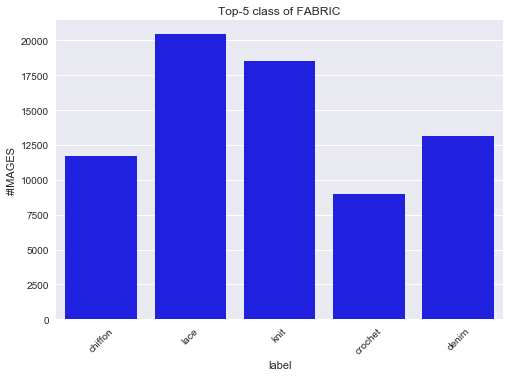

In [33]:
import seaborn as sb

# gen_order = df['label'].value_count().index
sb.countplot(data=df, x='label', color='blue')
# plt.bar(df, label=df['label'], color='blue')
# plt.legend()
plt.ylabel('#IMAGES')
plt.xticks(rotation=45)
plt.title('Top-5 class of FABRIC')
plt.savefig('fabric.png')
plt.show()

In [10]:
df.head(3)

,label,path
0,pleated,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg
1,pleated,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg
2,pleated,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg


# CLASS BALANCE

In [16]:
## balance classes
UPPER_LIMIT = 8000#9000

count_dict = defaultdict(lambda : 0)

labels =[]
paths =[]

for i,l in enumerate(image_label):
    if l=='lace' or l =='knit' or l =='denim' or l=='chiffon' or l=='crochet':
        if count_dict[l] < UPPER_LIMIT:
            labels.append(image_label[i])
            paths.append(image_path[i])
    count_dict[l]+=1
    
df = pd.DataFrame({'path':paths,'label':labels})
Counter(df['label'])

Counter({'chiffon': 8000,
         'crochet': 8000,
         'denim': 8000,
         'knit': 8000,
         'lace': 8000})

In [17]:
## PREPARE   TRAIN , TEST , VALIDATION :STRATIFIED
TEST_SIZE = 0.999

X_train, X_test, y_train, y_test = train_test_split(df['path'], df['label'],stratify=df['label'], test_size=TEST_SIZE)

train = pd.DataFrame({'path':X_train,'label':y_train})
test_data = pd.DataFrame({'path':X_test,'label':y_test})

# clear variables

del X_train, X_test, y_train, y_test
print "TRAIN data size "
print train.shape

print "TEST and VALIDATION data size  "
print test_data.shape

X_val, X_test, y_val, y_test = train_test_split(test_data['path'], test_data['label'],stratify=test_data['label'], test_size=0.25)

val = pd.DataFrame({'path':X_val,'label':y_val})
test = pd.DataFrame({'path':X_test,'label':y_test})

# clear variables

del X_val, X_test, y_val, y_test,df

Counter(test['label'])


#  ====== DROP INDEXES ============


val = val.reset_index(drop=True)
test = test.reset_index(drop=True)

TRAIN data size 
(40, 2)
TEST and VALIDATION data size  
(39960, 2)


In [18]:
print sum(Counter(test['label']).values())
print sum(Counter(val['label']).values())

9990
29970


In [13]:
val.head()

,label,path
0,lace,img/Boxy_Medallion_Print_Top/img_00000027.jpg
1,lace,img/Frayed_Denim_Shorts/img_00000008.jpg
2,lace,img/Victorian_Lace_Skirt/img_00000014.jpg
3,denim,img/Pleated_Floral_Print_Blouse/img_00000055.jpg
4,lace,img/Lace-Back_Henley_Tank/img_00000017.jpg


In [14]:
test.head()

,label,path
0,crochet,img/Swiss_Dot_Crochet_Tank/img_00000041.jpg
1,knit,img/Distressed_Slub_Knit_Tank/img_00000017.jpg
2,lace,img/Floral_Crochet_Tank/img_00000021.jpg
3,chiffon,img/Ruffled_Crepe_Woven_Blouse/img_00000006.jpg
4,lace,img/Leopard_Print_Skater_Skirt/img_00000028.jpg


In [19]:
## create directories and save data
# dest_dir = '/media/mint/New Volume/3_semester_IIIT_D/CF/project/small_data_attri2/test/'
dest_dir = '/media/mint/New Volume/3_semester_IIIT_D/CF/project/30_11_new/small_data_attri2/test/'

def create_folders(data):
    
    print "Total Images : "+str(data.shape[0])
    global dest_dir
    for i in data.index:
        label = data.iloc[i]['label']
        #print label
        src = img_path+data.iloc[i]['path']
        #print src
        #print dest_dir+'/'+label
        #break
        
#         if not os.path.exists(dest_dir+label):
#             os.makedirs(dest_dir+label)
            
        copyfile(src, dest_dir+label+'/'+data.iloc[i]['path'].split('/')[-2]+'_'+data.iloc[i]['path'].split('/')[-1])
        if i%1000==0:
            print i
    
create_folders(test)    

Total Images : 9990
0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [20]:
## create directories and save data
# dest_dir = '/media/mint/New Volume/3_semester_IIIT_D/CF/project/small_data_attri2/val/'
dest_dir = '/media/mint/New Volume/3_semester_IIIT_D/CF/project/30_11_new/small_data_attri2/val/'

def create_folders(data):
    
    print "Total Images : "+str(data.shape[0])
    global dest_dir
    for i in data.index:
        label = data.iloc[i]['label']
        src = img_path+data.iloc[i]['path']
        
#         if not os.path.exists(dest_dir+label):
#             os.makedirs(dest_dir+label)
            
        copyfile(src, dest_dir+label+'/'+data.iloc[i]['path'].split('/')[-2]+'_'+data.iloc[i]['path'].split('/')[-1])
        if i%1000==0:
            print i
    
create_folders(val)    

Total Images : 29970
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000


In [15]:
N_CLASSES = 5